In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/soi1234/unlabelled_data.csv
/kaggle/input/soi1234/labelled_data.csv
/kaggle/input/soi123/lightcurve_1.fits
/kaggle/input/soi123/bonus_image_1.fits


PART TWO

Filename: /kaggle/input/soi123/lightcurve_1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      55   ()      
  1  LIGHTCURVE    1 BinTableHDU    156   3862R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (10, 9)   int32   


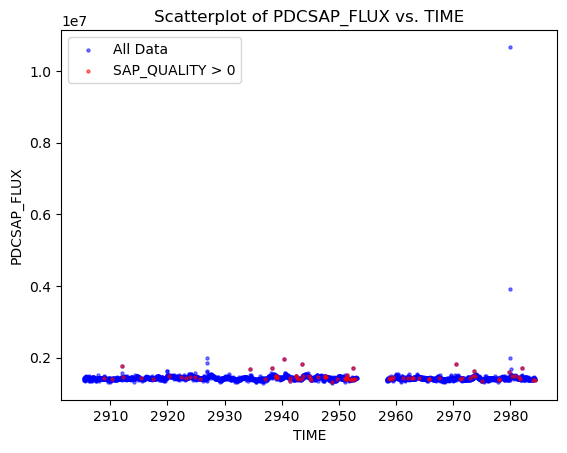

Text(0.5, 1.0, 'Lightcurve Image')

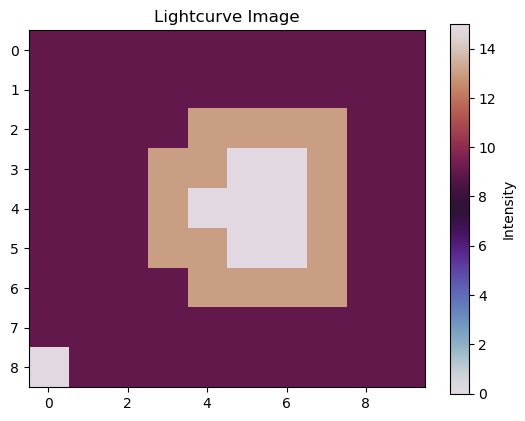

In [5]:
from astropy.io import fits
import matplotlib.pyplot as plt

#task1
# Open the FITS file
hdulist = fits.open('/kaggle/input/soi123/lightcurve_1.fits')

# Print information about the FITS file
hdulist.info()

# Access individual extensions
header = hdulist[0].header  # header is in the first extension
table = hdulist[1].data    # table is in the second extension
image = hdulist[2].data  # image is in the third extension

#task2
# Get the table data and columns
table = hdulist[1].data 
columns = table.columns

# Access the PDCSAP_FLUX and TIME columns
pdcsap_flux = table['PDCSAP_FLUX']
time = table['TIME']

# Close the FITS file
hdulist.close()

# Plot the scatterplot of PDCSAP_FLUX vs. TIME
plt.figure()
plt.scatter(time, pdcsap_flux, s=5, alpha=0.5, label='All Data',color='blue')
plt.xlabel('TIME')
plt.ylabel('PDCSAP_FLUX')
plt.title('Scatterplot of PDCSAP_FLUX vs. TIME')

#task3
sap_quality = table['SAP_QUALITY']
# Plot the values where SAP_QUALITY > 0 in a different color
mask = sap_quality > 0
plt.figure(1)
plt.scatter(time[mask], pdcsap_flux[mask], color='red', s=5, alpha=0.5, label='SAP_QUALITY > 0')
plt.legend()
plt.show()

#task4
# Display the lightcurve image
plt.figure()
hdulist=fits.open('/kaggle/input/soi123/lightcurve_1.fits')
image_data=hdulist[2].data
hdulist.close()
plt.imshow(image, cmap='twilight')
#plt.legend()
plt.colorbar(label='Intensity')
plt.title('Lightcurve Image')
